findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54620 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44544 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54256 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53944 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49444 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51221 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 54

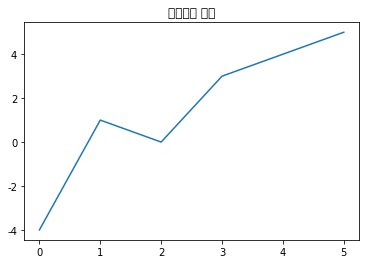

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [32]:
cd drive/MyDrive/데이터 분석/data

[Errno 2] No such file or directory: 'drive/MyDrive/데이터 분석/data'
/content/drive/MyDrive/데이터 분석/data


In [33]:
df= pd.read_csv('서울특별시 사회복지시설 목록.csv',encoding='cp949')

# 정리

In [34]:
#경기도 제거
df= df.drop(['시설코드','시군구코드'], axis=1)
df= df.drop([1508,1581,1663,1688,1966], axis=0)
df.head()

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
0,서울꽃동네신내노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,중랑구,서울특별시 중랑구 신내로 194
1,청운양로원,(노인) 양로시설,노인주거복지시설,자치구,이종명,종로구,서울특별시 종로구 비봉길 76 (구기동)
2,청운노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,종로구,서울특별시 종로구 비봉길 76 (구기동)
3,홍파양로원,(노인) 양로시설,노인주거복지시설,자치구,김우리,노원구,서울특별시 노원구 동일로248길 30 (상계동)
4,천사노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,강서구,서울특별시 강서구 강서로45다길 30-22


In [35]:
#시군구명 수정
df.reset_index(inplace=True, drop=True)
df[df['시군구명'].str.contains('서울')]

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
495,한국아동복지시설연합회,(아동) 아동양육시설,아동복지시설,자치구,성준경,서울특별시,서울특별시 용산구 갈월동 용산빌딩
1730,행복이가득한집2호,(장애인) 장애인공동생활가정,장애인거주시설,자치구,김세룡,서울특별시,서울특별시 강서구 월정로18길 20401 (화곡동)(화곡동)
1856,(사)굿하트데이케어센터,(노인) 재가노인복지시설,재가노인복지시설,자치구,길준영,서울특별시,서울특별시 동작구 상도로 121영진빌딩 4층(상도동) (상도동)
2131,서울시학대피해노인전용쉼터,(노인) 노인보호전문기관,노인보호전문기관,자치구,손세영,서울특별시,서울특별시 도봉구 도봉로108길 83-5 301호 (창동)
2853,서울시건강가정지원센터,(건강가정) 건강가정지원센터,건강가정지원센터,자치구,계선자,서울특별시,서울특별시 중구 소파로4길 6 (예장동)(예장동)
3057,서울시정신보건센터,(정신보건) 재활훈련시설-주간재활시설,정신재활시설,자치구,이명수,서울특별시,서울특별시 강남구 봉은사로 21길 6(논현동) 5-7층


In [36]:
df.loc[df.시설명 == '한국아동복지시설연합회', ('시군구명')] = '용산구'
df.loc[df.시설명 == '행복이가득한집2호', ('시군구명')] = '강서구'
df.loc[df.시설명 == '(사)굿하트데이케어센터', ('시군구명')] = '동작구'
df.loc[df.시설명 == '서울시학대피해노인전용쉼터', ('시군구명')] = '도봉구'
df.loc[df.시설명 == '서울시건강가정지원센터', ('시군구명')] = '중구'
df.loc[df.시설명 == '서울시정신보건센터', ('시군구명')] = '강남구'

In [37]:
df= df.rename(columns={'시군구명':'자치구'})

# groupby

In [42]:
df_old= df[df['시설종류명(시설유형)'].str.contains('노인')]
df_old.head()

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,자치구,시설주소
0,서울꽃동네신내노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,중랑구,서울특별시 중랑구 신내로 194
1,청운양로원,(노인) 양로시설,노인주거복지시설,자치구,이종명,종로구,서울특별시 종로구 비봉길 76 (구기동)
2,청운노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,종로구,서울특별시 종로구 비봉길 76 (구기동)
3,홍파양로원,(노인) 양로시설,노인주거복지시설,자치구,김우리,노원구,서울특별시 노원구 동일로248길 30 (상계동)
4,천사노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,강서구,서울특별시 강서구 강서로45다길 30-22


In [43]:
df_chi= df[df['시설종류명(시설유형)'].str.contains('아동')]
df_chi.head()

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,자치구,시설주소
456,구세군서울후생원,(아동) 아동양육시설,아동복지시설,자치구,김호규,서대문구,서울특별시 서대문구 독립문로8길 41(영천동)
457,남산원,(아동) 아동양육시설,아동복지시설,자치구,박흥식,중구,서울특별시 중구 소파로2길 31남산원
458,송죽원,(아동) 아동양육시설,아동복지시설,자치구,권명심,서대문구,서울특별시 서대문구 송죽길 23
459,강동꿈마을,(아동) 아동양육시설,아동복지시설,자치구,최은미,강동구,서울특별시 강동구 천호대로186길 21 (둔촌동)
460,리라아동복지관,(아동) 아동양육시설,아동복지시설,자치구,김두식,중구,경기도 안성시 용소길 65-0리라아동복지관


In [44]:
df_dis= df[df['시설종류명(시설유형)'].str.contains('장애인')]
df_dis.head()

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,자치구,시설주소
190,송파구방이복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,김진숙,송파구,서울특별시 송파구 오금로11길 68
197,서울시각장애인복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,허경아,송파구,서울특별시 송파구 삼학사로19길 27
198,서울시립발달장애인복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,최선자,동작구,서울특별시 동작구 여의대방로20길 33-0395(보라매공원내)
203,청음복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,심계원,강남구,서울특별시 강남구 봉은사로50길 6
204,마포장애인종합복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,김명규,마포구,서울특별시 마포구 성산로4길 353층(마포장애인종합복지관)(성산동)


# 시각화

In [40]:
df_co= df.groupby(['자치구'])['시설명'].count()
df_co= df_co.reset_index()
loca= df_co.rename(columns={'시설명':'수'})
loca= loca.sort_values(by=['수'], axis=0,ascending=False)

px.bar(loca, x='자치구', y='수',
        title= '<b>서울 복지시설 수<b>')

In [47]:
t= df.groupby(['자치구','시설종류상세명(시설종류)'])['자치구(시)구분'].count()
t= t.reset_index()
t= t.rename(columns={'자치구(시)구분':'수','시설종류상세명(시설종류)':'시설종류'})
t= t.sort_values(by=['수'], axis=0,ascending=False)

# 노원, 강서, 송파가 복지시설이 많았기에 각각의 구는 어떤 종류가 많은지 확인하기 위해.
# 노인 관련 시설이 가장 많다.

trace1= go.Bar(x= t[t['자치구'] == '노원구'].시설종류, y=t[t['자치구'] == '노원구'].수)
layout = go.Layout(title='<b>노원구 복지시설<b>')
fig = go.Figure(trace1, layout=layout)

fig.show()

In [46]:
# 노원구와는 다르게 노인복지시설 다음으로 장애인 거주시설이 많다.

trace1= go.Bar(x= t[t['자치구'] == '강서구'].시설종류, y=t[t['자치구'] == '강서구'].수)
layout = go.Layout(title='<b>강서구 복지시설<b>')
fig = go.Figure(trace1, layout=layout)

fig.show()

In [48]:
# 아동복지시설이 가장 많다.
trace1= go.Bar(x= t[t['자치구'] == '송파구'].시설종류, y=t[t['자치구'] == '송파구'].수)
layout = go.Layout(title='<b>송파구 복지시설<b>')
fig = go.Figure(trace1, layout=layout)

fig.show()

In [49]:
# 제일 시설 수가 적은 중구를 확인해보니 이곳은 노인 복지시설이 많다.

trace1= go.Bar(x= t[t['자치구'] == '중구'].시설종류, y=t[t['자치구'] == '중구'].수)
layout = go.Layout(title='<b>중구 복지시설<b>')
fig = go.Figure(trace1, layout=layout)

fig.show()

## 노인

In [51]:
old= df_old.groupby(['자치구','시설종류상세명(시설종류)'])['자치구(시)구분'].count()
n= old.reset_index()
df_o= n.rename(columns={'자치구(시)구분':'수','시설종류상세명(시설종류)':'시설종류'})
df_o= df_o.groupby(by='시설종류').sum().reset_index()

In [58]:
fig= px.pie(df_o, values='수', names='시설종류',hover_name="시설종류",color='시설종류',
                     color_discrete_sequence= px.colors.qualitative.Set3, hole=.4)
fig.update_layout(title= '<b>서울시 노인 복지시설 종류<b>')

fig.show()

## 장애인

In [53]:
disabled= df_dis.groupby(['자치구','시설종류상세명(시설종류)'])['자치구(시)구분'].count()
x= disabled.reset_index()
df_d= x.rename(columns={'자치구(시)구분':'수','시설종류상세명(시설종류)':'시설종류'})
df_d= df_d.groupby(by='시설종류').sum().reset_index()

In [57]:
fig= px.pie(df_d, values='수', names='시설종류',hover_name="시설종류",color='시설종류',
                     color_discrete_sequence= px.colors.qualitative.Set3, hole=.4)
fig.update_layout(title= '<b>서울시 장애인 복지시설 종류<b>')

fig.show()